# PyLearningHub: Capacitación Integral en Python
Este notebook resume el proyecto PyLearningHub y sirve como entregable de portafolio, cubriendo desde conceptos básicos hasta Python avanzado.

## Situación Inicial 📍
El Departamento de Formación y Capacitación solicitó un curso intensivo en Python. Los participantes aprenderán desde fundamentos hasta técnicas avanzadas de programación, POO, estructuras de datos, manejo de excepciones y desarrollo de módulos.

## Objetivos del Curso 📋
- Programación Orientada a Objetos (POO)
- Estructuras de Datos y Sentencias Iterativas
- Funciones y Módulos
- Manejo de Excepciones
- Sentencias Básicas de Python
- Uso Avanzado del Lenguaje

## 1. Sentencias Básicas

In [1]:
# Variables y Tipos de Datos
x = 10
y = 3.5
nombre = 'Ana'
activo = True
print(x, y, nombre, activo)

10 3.5 Ana True


In [2]:
# Condicionales
if x > y:
    print('x es mayor que y')
else:
    print('y es mayor o igual a x')

x es mayor que y


In [3]:
# Bucles
for i in range(5):
    print('Iteración', i)

contador = 0
while contador < 3:
    print('Contador', contador)
    contador += 1

Iteración 0
Iteración 1
Iteración 2
Iteración 3
Iteración 4
Contador 0
Contador 1
Contador 2


## 2. Funciones y Módulos

In [4]:
# Funciones
def saludar(nombre='Usuario'):
    print(f'Hola {nombre}!')

saludar('Cristian')
saludar()

Hola Cristian!
Hola Usuario!


In [5]:
# Función con retorno
def multiplicar(a, b):
    return a*b

resultado = multiplicar(5,7)
print('Resultado:', resultado)

Resultado: 35


## 3. Estructuras de Datos

In [6]:
# Listas
numeros = [1,2,3,4,5]
print('Lista:', numeros)
print('Cuadrados:', [x**2 for x in numeros])

Lista: [1, 2, 3, 4, 5]
Cuadrados: [1, 4, 9, 16, 25]


In [7]:
# Diccionarios
persona = {'nombre':'Ana','edad':28}
print(persona)
print('Edad:', persona['edad'])

{'nombre': 'Ana', 'edad': 28}
Edad: 28


In [8]:
# Conjuntos
conjunto = {1,2,2,3}
print(conjunto)

{1, 2, 3}


## 4. Programación Orientada a Objetos

In [9]:
class Persona:
    def __init__(self, nombre, edad):
        self.nombre = nombre
        self.edad = edad
    def saludar(self):
        print(f'Hola, mi nombre es {self.nombre} y tengo {self.edad} años.')

# Instancia
p = Persona('Luis', 34)
p.saludar()

Hola, mi nombre es Luis y tengo 34 años.


In [10]:
# Herencia
class Estudiante(Persona):
    def __init__(self, nombre, edad, curso):
        super().__init__(nombre, edad)
        self.curso = curso
    def info_curso(self):
        print(f'Estudio {self.curso}')

e = Estudiante('María', 29, 'Python')
e.saludar()
e.info_curso()

Hola, mi nombre es María y tengo 29 años.
Estudio Python


## 5. Manejo de Excepciones

In [11]:
try:
    resultado = 10 / 0
except ZeroDivisionError:
    print('Error: División por cero')
finally:
    print('Proceso finalizado')

Error: División por cero
Proceso finalizado


## 6. Librerías para Ingeniería de Datos

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# DataFrame de ejemplo
data = {
    'Nombre': ['Ana','Luis','María','Pedro'],
    'Edad': [28,34,29,40],
    'Ciudad': ['Santiago','Valparaíso','Concepción','Santiago'],
    'Salario': [50000,60000,55000,65000]
}
df = pd.DataFrame(data)
df['Salario_scaled'] = (df['Salario']-df['Salario'].mean())/df['Salario'].std()
df

,Nombre,Edad,Ciudad,Salario,Salario_scaled
0,Ana,28,Santiago,50000,-1.161895
1,Luis,34,Valparaíso,60000,0.387298
2,María,29,Concepción,55000,-0.387298
3,Pedro,40,Santiago,65000,1.161895


C:\Users\clabra\AppData\Local\Temp\ipykernel_17232\1470539704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre', y='Salario', data=df, palette='viridis')


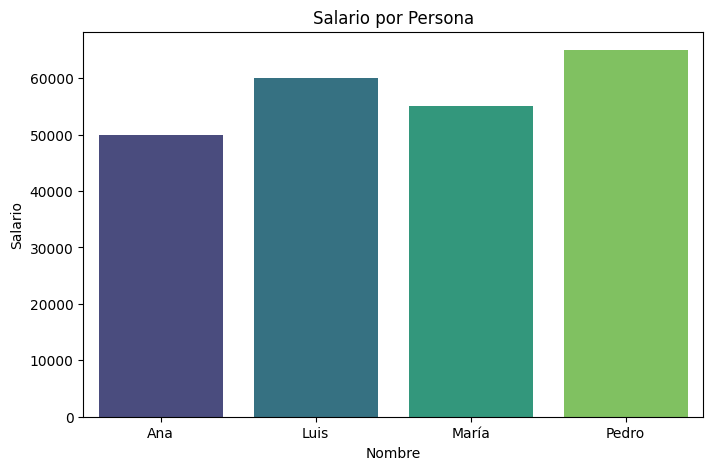

In [14]:
# Visualización
plt.figure(figsize=(8,5))
sns.barplot(x='Nombre', y='Salario', data=df, palette='viridis')
plt.title('Salario por Persona')
plt.show()

In [15]:
# Agrupación
grouped = df.groupby('Ciudad')[['Edad','Salario','Salario_scaled']].mean()
grouped

,Edad,Salario,Salario_scaled
Ciudad,,,
Concepción,29.0,55000.0,-0.387298
Santiago,34.0,57500.0,0.000000
Valparaíso,34.0,60000.0,0.387298


In [16]:
# Preparación de datos para ML
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
ciudad_encoded = encoder.fit_transform(df[['Ciudad']])
df_ciudad = pd.DataFrame(ciudad_encoded, columns=encoder.get_feature_names_out(), index=df.index)
df_encoded = pd.concat([df, df_ciudad], axis=1)

# Definir X e y
X = df_encoded[['Edad','Salario_scaled'] + list(encoder.get_feature_names_out())]
y = df_encoded['Salario']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 9645061.728395022
